# COMP9414 Assignment 2 
### Zid: z5518413 
### Name: Aayushmaan Hooda

In [23]:
#importing libraries
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from tabulate import tabulate

# numpy version not supporting np.bool8 attribute so using n.bool_
np.bool8 = np.bool_

In [24]:
#creating environment 
env=gym.make("Taxi-v3",render_mode="ansi").env

#setting hyperparameters
epsilon= 1.0
max_epsilon = 1.0
min_epsilon = 0.01
decay_rate = 0.01  
alpha = 0.1
gamma = 0.95 #discount factor
episodes = 5000

# Usage Functions

In [25]:

#value functions
def greedy_policy(state, Q):
    return np.argmax(Q[state, :])


def epsilon_greedy_policy(state, Q, epsilon):
    if np.random.rand() < epsilon:
        return np.random.randint(env.action_space.n)
    else:
        return np.argmax(Q[state, :])

#loading and saving files
def saving_q_table(Q, filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(Q)

def loading_q_table(filename):
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    with open(filename, 'r') as file:
        reader = csv.reader(file)
        for i, row in enumerate(reader):
            Q[i] = [float(val) for val in row]
    return Q


# Q-learning Training

In [26]:
# Implement Q-learning algorithm
def q_learning():

    # Initialize Q-table with zeros
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    rewards, steps = [], [] 
    epsilon = max_epsilon  # Start with the maximum value of epsilon for exploration
    
    # Loop over the number of episodes
    for ep_ in range(episodes):
        state = env.reset()  # Reset the environment to the initial state
        if isinstance(state, tuple):  # If state is a tuple (due to the environment reset method), extract the state value
            state = state[0]
        
        total_reward = 0 
        step = 0  
        completed = False 
        
        # Loop until the episode is completed
        while not completed:
            action = epsilon_greedy_policy(state, Q, epsilon)  # Choose an action based on epsilon-greedy policy
            result = env.step(action)  # Take the action and observe the result
            next_state, reward, completed, *rest = result  # Unpack the result
            info = rest[-1]  # Extract additional information (if any)
            completed = completed or (len(rest) == 2 and rest[0])  # Update completion flag if necessary
            
            # Update Q-value using the Q-learning update rule
            Q[state, action] += alpha * (reward + gamma * np.max(Q[next_state, :]) - Q[state, action])
            
            # Update total reward, state, and step counter
            total_reward, state, step = total_reward + reward, next_state, step + 1
            
            # If the episode is completed, exit the loop
            if completed:
                break
        
        rewards.append(total_reward)  
        steps.append(step)  
        
        # Decay epsilon to reduce exploration over time
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * ep_)
    
    saving_q_table(Q, 'q-learning.csv')  
    return rewards, steps 

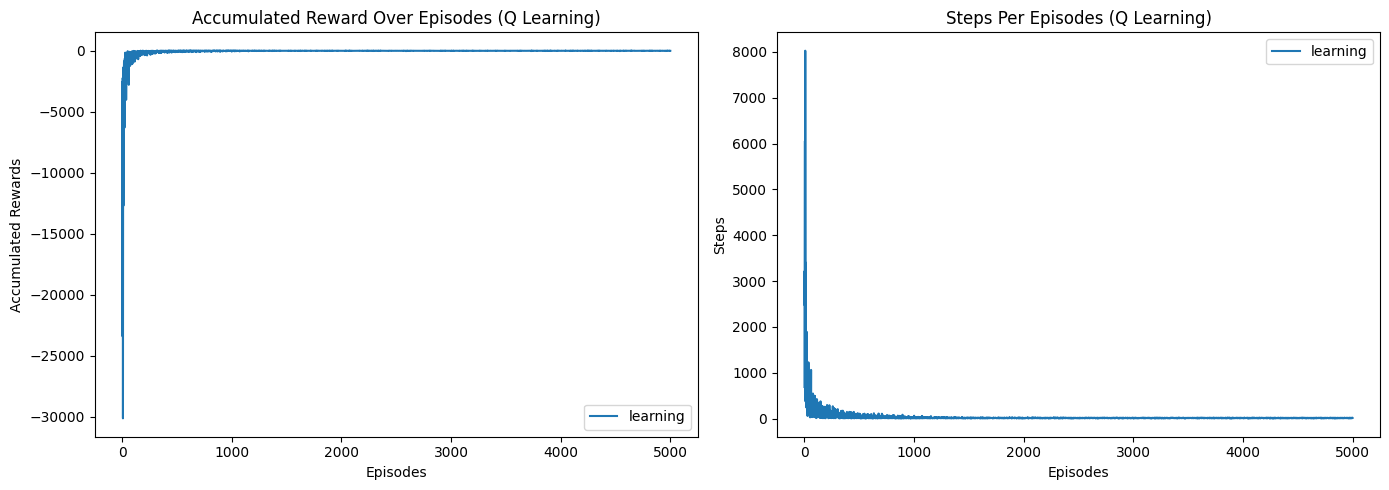

In [27]:
# Running and plotting Q-learning

# Run the Q-learning algorithm and get the rewards and steps per episode
q_rewards, q_steps = q_learning()

# Create a figure with two subplots (side by side)
fig, (p1, p2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot accumulated rewards over episodes on the first subplot
p1.plot(q_rewards, label='learning') 
p1.set_title('Accumulated Reward Over Episodes (Q Learning)')  
p1.set_xlabel('Episodes')  
p1.set_ylabel('Accumulated Rewards')  
p1.legend(loc='best')  

# Plot steps per episode on the second subplot
p2.plot(q_steps, label='learning')  
p2.set_title('Steps Per Episodes (Q Learning)')  
p2.set_xlabel('Episodes')  
p2.set_ylabel('Steps')  
p2.legend(loc='best')  

# Adjust layout to prevent overlap and improve appearance
plt.tight_layout()

# Display the plots
plt.show()


# Q-learning Testing

In [28]:
def q_test_algorithm(algorithm, filename):

    # Load the Q-table from the specified file
    Q = loading_q_table(filename)
    rewards, steps = [], [] 
    render_episode = random.randint(1, 100)  # Randomly select an episode to render for visualization
    
    # Loop over a fixed number of test episodes (100 in this case)
    for ep_ in range(100):
        state = env.reset()  # Reset the environment to the initial state
        if isinstance(state, tuple):  # If state is a tuple (due to the environment reset method), extract the state value
            state = state[0]
        
        total_reward = 0  
        step = 0  
        completed = False  
        
        # Loop until the episode is completed
        while not completed:
            render_env = env.render()
            action = greedy_policy(state, Q)    
            result = env.step(action)  
            next_state, reward, completed, *rest = result  # Unpack the result
            info = rest[-1]  # Extract additional information (if any)
            completed = completed or (len(rest) == 2 and rest[0])  # Update completion flag if necessary
            
            # Update total reward and state
            total_reward, state = total_reward + reward, next_state
            
            # Render the selected episode for visualization
            if ep_ == render_episode:
                print(render_env)
                print(f'Step {step}')
                print(f"State: {state}, Action = {action}, Reward = {reward}, Total Accumulated Reward: {total_reward}\n")
            
            step += 1  
            
            # If the episode is completed or steps exceed 100, exit the loop
            if completed or step >= 99:
                if ep_ == render_episode:
                    print(env.render())
                break
        
        rewards.append(total_reward)  
        steps.append(step)  
    
    return rewards, steps  # Return the rewards and steps for all test episodes

# Testing Q-learning
q_test_rewards, q_test_steps = q_test_algorithm('Q-learning', 'q-learning.csv')


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step 0
State: 221, Action = 3, Reward = -1, Total Accumulated Reward: -1

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step 1
State: 121, Action = 1, Reward = -1, Total Accumulated Reward: -2

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step 2
State: 101, Action = 3, Reward = -1, Total Accumulated Reward: -3

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

Step 3
State: 1, Action = 1, Reward = -1, Total Accumulated Reward: -4

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)

Step 4
State: 17, Action = 4, Reward = -1, Total Accumulated Reward: -5

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Step 5
State: 117, Action = 0, Reward = -1, Total Accumulated Reward: -6


# Calculating Mean Scores

In [29]:
mean_rewards = np.mean(q_test_rewards)
mean_steps = np.mean(q_test_steps)

# Create a table with the results
table = [
    ["Algorithm", "Mean Rewards", "Mean Steps"],
    ["Q-learning", mean_rewards, mean_steps]
]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒═════════════╤════════════════╤══════════════╕
│ Algorithm   │   Mean Rewards │   Mean Steps │
╞═════════════╪════════════════╪══════════════╡
│ Q-learning  │           8.03 │        12.97 │
╘═════════════╧════════════════╧══════════════╛


# Sarsa Training

In [30]:
def sarsa():
    # Initialize Q-table with zeros
    Q = np.zeros([env.observation_space.n, env.action_space.n])
    rewards, steps = [], [] 
    epsilon = max_epsilon 
    
    # Loop over the number of episodes
    for ep_ in range(episodes):
        state = env.reset()  
        if isinstance(state, tuple):  # If state is a tuple (due to the environment reset method), extract the state value
            state = state[0]
        
        action = epsilon_greedy_policy(state, Q, epsilon)  
        total_reward = 0  
        step = 0  
        completed = False  
        
        # Loop until the episode is completed
        while not completed:
            result = env.step(action)  
            next_state, reward, completed, *rest = result  # Unpack the result
            info = rest[-1]  # Extract additional information (if any)
            completed = completed or (len(rest) == 2 and rest[0])  # Update completion flag if necessary
            
            next_action = epsilon_greedy_policy(next_state, Q, epsilon)  
            
            # Update Q-value using the SARSA update rule
            Q[state, action] += alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])
            
            # Update total reward, state, action, and step counter
            total_reward, state, action, step = total_reward + reward, next_state, next_action, step + 1
            
            # If the episode is completed, exit the loop
            if completed:
                break
        
        rewards.append(total_reward)  
        steps.append(step) 
        
        # Decay epsilon to reduce exploration over time
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate * ep_)
    
    saving_q_table(Q, 'q-sarsa.csv')  # Save the Q-table to a CSV file
    return rewards, steps  


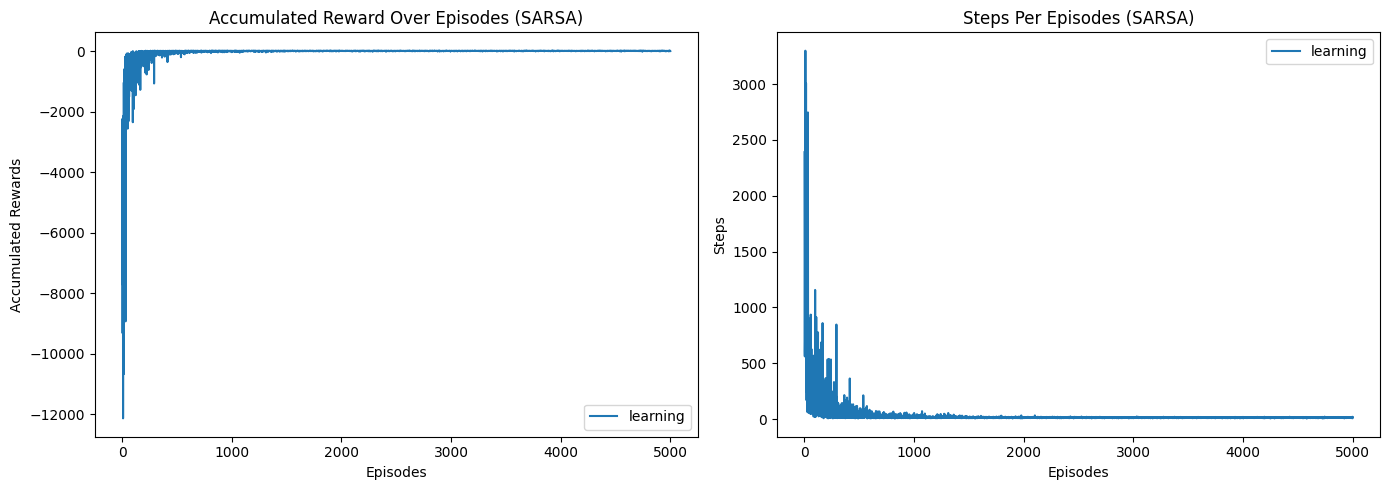

In [31]:

# Run the SARSA algorithm and get the rewards and steps per episode
sarsa_rewards, sarsa_steps = sarsa()

# Create a figure with two subplots (side by side)
fig, (p1, p2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot accumulated rewards over episodes on the first subplot
p1.plot(sarsa_rewards, label="learning") 
p1.set_title('Accumulated Reward Over Episodes (SARSA)')  
p1.set_xlabel('Episodes') 
p1.set_ylabel('Accumulated Rewards')  
p1.legend(loc='best')  

# Plot steps per episode on the second subplot
p2.plot(sarsa_steps, label="learning") 
p2.set_title('Steps Per Episodes (SARSA)') 
p2.set_ylabel('Steps')  
p2.legend(loc='best')  

# Adjust layout to prevent overlap and improve appearance
plt.tight_layout()

# Display the plots
plt.show()


# Sarsa Testing

In [32]:
def sarsa_test_algorithm(algorithm, filename):
    
    # Load the Q-table from the specified file
    Q = loading_q_table(filename)
    rewards, steps = [], [] 
    render_episode = random.randint(1, 100)  # Randomly select an episode to render for visualization
    
    # Loop over a fixed number of test episodes (100 in this case)
    for episode in range(100):
        state = env.reset() 
        if isinstance(state, tuple):  # If state is a tuple (due to the environment reset method), extract the state value
            state = state[0]
        
        total_reward = 0  
        step = 0 
        rendered_env=env.render()
        action = greedy_policy(state, Q)  
        completed = False
        
        
        # Loop until the episode is completed
        while not completed:
            result = env.step(action) 
            next_state, reward, completed, *rest = result  # Unpack the result
            info = rest[-1]  # Extract additional information (if any)
            completed = completed or (len(rest) == 2 and rest[0])  # Update completion flag if necessary
            
            total_reward += reward  
            step += 1  
            
            # Render the selected episode for visualization
            if episode == render_episode:
                print(rendered_env)
                print(f'Step {step}')
                print(f"State: {state}, Action = {action}, Reward = {reward}, Total Accumulated Reward: {total_reward}\n")
            
            # If the episode is completed or steps exceed 100, exit the loop
            if completed or step >= 99:
                if episode == render_episode:
                    print(env.render())
                rewards.append(total_reward)  
                steps.append(step)  
                break
            
            # Choose the next action based on the greedy policy
            next_action = greedy_policy(next_state, Q)
            state = next_state  
            action = next_action 
            rendered_env = env.render()
    return rewards, steps  

# Testing SARSA
sarsa_test_rewards, sarsa_test_steps = sarsa_test_algorithm('SARSA', 'q-sarsa.csv')


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


Step 1
State: 1, Action = 4, Reward = -1, Total Accumulated Reward: -1

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

Step 2
State: 17, Action = 0, Reward = -1, Total Accumulated Reward: -2

+---------+
|R: | : :G|
|_: | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step 3
State: 117, Action = 2, Reward = -1, Total Accumulated Reward: -3

+---------+
|R: | : :G|
| :_| : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step 4
State: 137, Action = 0, Reward = -1, Total Accumulated Reward: -4

+---------+
|R: | : :G|
| : | : : |
| :_: : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

Step 5
State: 237, Action = 2, Reward = -1, Total Accumulated Reward: -5

+---------+
|R: | : :G|
| : | : : |
| : :_: : |
| | : | : |
|Y| : |B: |
+---------+
  (East)

Step 6
State: 257, Action = 1, Reward = -1, Total Accumulated Reward: -6


# Calculating Mean Scores

In [33]:
mean_rewards = np.mean(sarsa_test_rewards)
mean_steps = np.mean(sarsa_test_steps)

# Create a table with the results
table = [
    ["Algorithm", "Mean Rewards", "Mean Steps"],
    ["SARSA", mean_rewards, mean_steps]
]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒═════════════╤════════════════╤══════════════╕
│ Algorithm   │   Mean Rewards │   Mean Steps │
╞═════════════╪════════════════╪══════════════╡
│ SARSA       │           7.78 │        13.22 │
╘═════════════╧════════════════╧══════════════╛
